# Libraries and Packages 

In [24]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.layers import Conv1D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [4]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)

In [5]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
# Let's take data of only every hour instead of including all data of every 10 minutes
df = df[5::6]
df.index = pd.to_datetime(df['Date Time'], format = "%d.%m.%Y %H:%M:%S")
temp = df['T (degC)']

In [7]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [8]:
def prepare_data(df, step):
    df_as_numpy = df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_numpy)-step):
        rows = [[a] for a in df_as_numpy[i:i+step]]
        x.append(rows)
        label = df_as_numpy[i+step]
        y.append(label)
    return np.array(x), np.array(y)

In [9]:
x1, y1 = prepare_data(temp, 5)

In [10]:
def train_val_test_data(x, y, df):
    train = int(len(x)*0.7)
    val = int(len(x)*0.85)
    test = int(len(x))

    x_train, y_train = x[:train], y[:train]
    x_val, y_val = x[train:val], y[train:val]
    x_test, y_test = x[val:test], y[val:test]


    dates_train = df[0:train]
    dates_val = df[train:val]
    dates_test = df[val:test]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [11]:
x_train1, y_train1, x_val1, y_val1, x_test1, y_test1 = train_val_test_data(x1, y1, temp)

# Deep Learning_LSTM Modeling

In [12]:
def LSTM_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(LSTM(units = 64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(units = 64, return_sequences=True))
    model.add(LSTM(units = 64))
    model.add(Dense(units = 32, activation = 'linear'))
    model.add(Dense(1)) 
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()    
    
    return forecast

In [13]:
lstm_forecast = LSTM_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)


Epoch 1/10


1534/1534 [==============================] - 14s 6ms/step - loss: 16.9278 - mean_absolute_error: 2.5428 - val_loss: 2.0835 - val_mean_absolute_error: 1.0035
Epoch 2/10
1534/1534 [==============================] - 8s 5ms/step - loss: 1.5766 - mean_absolute_error: 0.8651 - val_loss: 1.0597 - val_mean_absolute_error: 0.6930
Epoch 3/10
1534/1534 [==============================] - 8s 5ms/step - loss: 1.0111 - mean_absolute_error: 0.6889 - val_loss: 0.9286 - val_mean_absolute_error: 0.6551
Epoch 4/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.8627 - mean_absolute_error: 0.6359 - val_loss: 0.8207 - val_mean_absolute_error: 0.6119
Epoch 5/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.7980 - mean_absolute_error: 0.6113 - val_loss: 0.7723 - val_mean_absolute_error: 0.5921
Epoch 6/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.7545 - mean_absolute_error: 0.5950 - val_loss: 0.7245 - val_mean_absolute_error: 0.5733

In [14]:
def plot_lstm_prediction(lstm_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':lstm_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(lstm_forecast, y)

(       Predictions  Actuals
 0         6.546831     6.47
 1         6.478854     6.39
 2         6.378607     6.43
 3         6.486237     6.15
 4         6.044982     6.26
 ...            ...      ...
 10508    -0.836754    -0.98
 10509    -1.574630    -1.40
 10510    -1.867940    -2.75
 10511    -3.164657    -2.89
 10512    -3.251159    -3.93
 
 [10513 rows x 2 columns],
 0.5583868515395622)

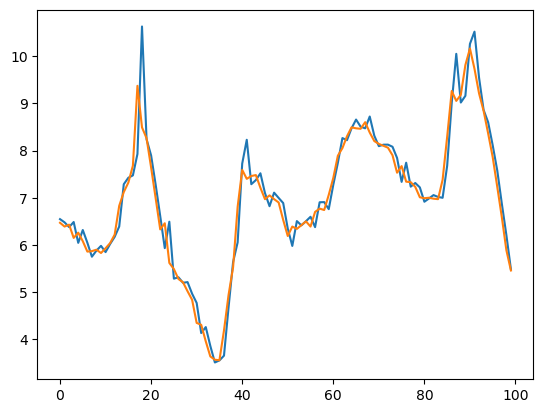

In [15]:
plot_lstm_prediction(lstm_forecast, y_test1)

# CNN Modeling

In [16]:
def CNN_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 3, input_shape = (x_train.shape[1], x_train.shape[2])))
    model.add(Flatten())
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))  
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()
    
    return forecast

In [17]:
cnn_forecast = CNN_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)

Epoch 1/10
1534/1534 [==============================] - 3s 1ms/step - loss: 34.3910 - mean_absolute_error: 3.3732 - val_loss: 3.6147 - val_mean_absolute_error: 1.3849
Epoch 2/10
1534/1534 [==============================] - 2s 1ms/step - loss: 2.4255 - mean_absolute_error: 1.1115 - val_loss: 1.5580 - val_mean_absolute_error: 0.8585
Epoch 3/10
1534/1534 [==============================] - 2s 1ms/step - loss: 1.3291 - mean_absolute_error: 0.7998 - val_loss: 1.1337 - val_mean_absolute_error: 0.7332
Epoch 4/10
1534/1534 [==============================] - 2s 1ms/step - loss: 1.0119 - mean_absolute_error: 0.6934 - val_loss: 0.9091 - val_mean_absolute_error: 0.6504
Epoch 5/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.8362 - mean_absolute_error: 0.6259 - val_loss: 0.7951 - val_mean_absolute_error: 0.6037
Epoch 6/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.7557 - mean_absolute_error: 0.5935 - val_loss: 0.7481 - val_mean_absolute_error: 0.5858
Epo

In [25]:
def plot_cnn_prediction(cnn_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':cnn_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(cnn_forecast, y)

(       Predictions  Actuals
 0         6.626572     6.47
 1         6.576948     6.39
 2         6.481844     6.43
 3         6.571440     6.15
 4         6.179086     6.26
 ...            ...      ...
 10508    -1.226485    -0.98
 10509    -1.623008    -1.40
 10510    -1.713397    -2.75
 10511    -3.311838    -2.89
 10512    -3.230840    -3.93
 
 [10513 rows x 2 columns],
 0.5975976304920675)

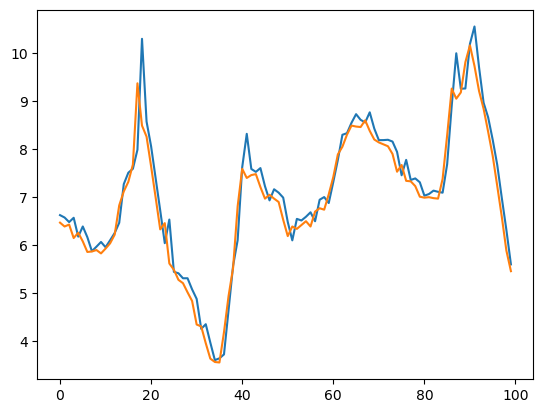

In [26]:
plot_cnn_prediction(cnn_forecast, y_test1)

# Deep Learning_GRU Modeling

In [20]:
def GRU_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(GRU(units = 64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(GRU(units = 64, return_sequences=True))
    model.add(GRU(units = 64))
    model.add(Dense(units = 32, activation = 'linear'))
    model.add(Dense(1)) 
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()    
    
    return forecast

In [21]:
gru_forecast = GRU_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)

Epoch 1/10
1534/1534 [==============================] - 13s 6ms/step - loss: 12.0910 - mean_absolute_error: 1.8584 - val_loss: 1.1405 - val_mean_absolute_error: 0.6779
Epoch 2/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.9074 - mean_absolute_error: 0.6474 - val_loss: 0.7986 - val_mean_absolute_error: 0.5983
Epoch 3/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.7448 - mean_absolute_error: 0.5898 - val_loss: 0.7489 - val_mean_absolute_error: 0.5857
Epoch 4/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.6976 - mean_absolute_error: 0.5717 - val_loss: 0.6807 - val_mean_absolute_error: 0.5496
Epoch 5/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.6694 - mean_absolute_error: 0.5577 - val_loss: 0.6704 - val_mean_absolute_error: 0.5437
Epoch 6/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.6572 - mean_absolute_error: 0.5521 - val_loss: 0.6741 - val_mean_absolute_error: 0.5530
Ep

In [22]:
def plot_gru_prediction(gru_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':gru_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(gru_forecast, y)

(       Predictions  Actuals
 0         6.453603     6.47
 1         6.410348     6.39
 2         6.302873     6.43
 3         6.407633     6.15
 4         5.968951     6.26
 ...            ...      ...
 10508    -1.437297    -0.98
 10509    -1.553615    -1.40
 10510    -1.591648    -2.75
 10511    -3.233403    -2.89
 10512    -3.185855    -3.93
 
 [10513 rows x 2 columns],
 0.5547364347353727)

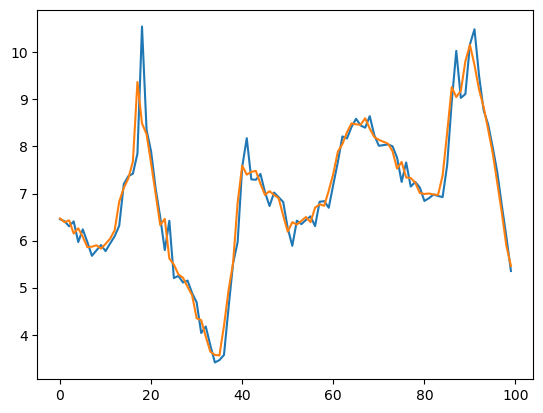

In [23]:
plot_gru_prediction(gru_forecast, y_test1)

In [27]:
# Comparison of the models show the less error obtained for RNN models (LSTM, GRU) as opposed to CNN model.

In [29]:
# Future work I will focus on compare the various machine learning models in their foreasting efficiency 